In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [9]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA'] = Table(dat[1].data)

    return result

In [10]:
fpaths = glob.glob('/global/cscratch1/sd/mjwilson/norberg/GAMA4/ddrp_limits/*.fits')

In [11]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

In [14]:
gama_kE = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
386805,587727944563819000,134.01009244,2.32209878,18.999538,0.19489,4,G09_Y2_021_192,6,21.098183,19.805834,19.002657,18.573671,18.334898,671.3846300853444,39.1348569739141,0.8031769,0.6207474460688747,0,4,-0.043401164231396824,0.13902826958254105,0.1745780060255559,0.4107686751775556,0.5669862107308128,2.12,-0.18904331,-0.4131668,-20.120853245043946,-19.896729767108155,39.120391666674806,38.896268188739015
196108,587725073914003977,129.40701904,-0.70191331,19.317492,0.1769,4,G09_Y2_019_103,6,20.896608,19.965784,19.284044,18.873354,18.67871,602.5196376086117,38.899856031056714,0.6817398,0.5468141266713421,0,4,-0.06938452547299719,0.06554115498456703,0.13781159009089128,0.31130577871524984,0.5082456185045476,2.12,-0.17159301,-0.37502798,-19.548583079349967,-19.345148105394813,38.86607461072204,38.66263963676688
3581319,587729150375362743,132.22724598,-1.52302925,17.708998,0.21845,4,G09_Y4_227_197,6,19.991367,18.631165,17.707405,17.242115,16.91901,763.5372292561811,39.4141510882087,0.92375946,0.6722014342809547,0,4,-0.015126542544098703,0.23643148362416533,0.20636152599301677,0.5272372237588918,0.6028837626833436,2.12,-0.2118965,-0.46311396,-21.699618393730333,-21.448400924157312,39.40861612017076,39.15739865059774
3583283,587729150375821538,133.29179777,-1.62363597,19.004656,0.07737,4,G09_Y4_239_058,6,20.095257,19.215954,19.001188,18.822033,18.742218,246.19238260163945,36.95637305684218,0.21476555,0.2327932438664232,0,2,-0.10164614078540275,-0.11967383594552983,0.06312904423149192,0.03171773689897445,0.24617685603857214,2.12,-0.07504891,-0.1640244,-17.939797354469707,-17.85082186533015,36.944453192482406,36.85547770334285
301894,587726032229105915,135.59405392,1.2824009,16.884815,0.13108,5,528210091002849280,6,20.099348,17.841904,16.780191,16.346266,15.997567,433.17604316774094,38.183322149649214,1.0617123,0.9774386323843438,0,6,-0.060613110767923827,0.023660521862380823,0.1706670944326003,0.4173594637694922,0.8150198956777566,0.8,-0.1271476,-0.104864,-21.342026427962622,-21.364310026743254,38.226841644027076,38.24912524280771
418145,587728879258239301,135.12374329,2.57136785,18.704964,0.12964,4,G09_Y1_DX2_383,6,20.994415,19.530191,18.758545,18.315557,18.036816,427.99808211047826,38.157209114567,0.7716465,0.7167258705330736,0,5,-0.07574448305343172,-0.02082385395271634,0.14877992383604488,0.286479601943904,0.63394682152593,0.8,-0.1257508,-0.103712,-19.475274559314265,-19.497313354368224,38.180238243396296,38.202277038450255
569269,588848899392667895,218.52591376,-0.42654574,19.378517,0.22188,4,G15_Y3_033_178,6,21.855558,20.410545,19.39021,18.927923,18.596373,777.1363735519409,39.452486182062515,1.0203362,0.740540917017054,0,5,0.008442750412102878,0.2882379845180956,0.23459122141309607,0.6043656704515488,0.6505617020845942,0.8,-0.21522361,-0.177504,-20.093336642195553,-20.131056249548763,39.47185379307446,39.50957340042767
3860373,588010930295800053,133.37415158,-1.84596148,19.05723,0.1052,4,G09_Y4_219_046,6,21.321253,19.676575,19.031342,18.663939,18.54741,341.4890012716901,37.66688360210919,0.64523315,0.6374839062662768,0,4,-0.09922906229948192,-0.09147981426888362,0.11989144876395252,0.18646198064038305,0.5786626224204445,2.12,-0.102044,-0.22302398,-18.627501053923943,-18.506521074289658,37.68473104965148,37.5637510700172


0	12.000	0.131	0.146	False
1	12.000	0.131	0.146	True
2	19.800	0.933	0.779	False
3	12.000	0.933	0.779	True
4	19.800	0.443	0.415	False
5	12.000	0.298	0.287	False
6	19.800	0.785	0.683	True
7	12.000	0.443	0.415	True
8	12.000	0.933	0.779	False
9	19.800	1.067	0.905	False
10	19.800	0.603	0.550	False
11	12.000	0.298	0.287	True
12	19.800	0.131	0.146	False
13	12.000	0.785	0.683	False
15	12.000	0.603	0.550	False
16	19.800	0.443	0.415	True
17	19.800	0.785	0.683	False
19	12.000	1.067	0.905	True
20	19.800	0.131	0.146	True
21	19.800	0.298	0.287	False
22	19.800	0.933	0.779	True
23	19.800	0.298	0.287	True
24	12.000	1.067	0.905	False
25	12.000	0.443	0.415	False
26	12.000	0.785	0.683	True
27	19.800	1.067	0.905	True


(-16.5, -22.5)

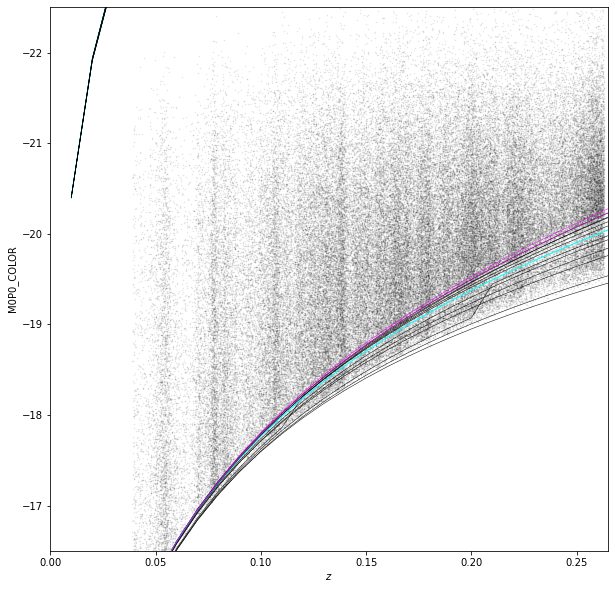

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']

    rlim = ddp_limit['RLIM']
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1.)
        continue
    
    if (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)

    elif (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5)
    
    print('{:d}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], s=0.25, alpha=0.1, c='k')
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('M0P0_COLOR')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

# Done.